# PROGETTO CNN PER CLASSIFICAZIONE IN 10 CLASSI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2


from keras.datasets.fashion_mnist import load_data


### Data Preparation

In [2]:
# Caricamento del dataset 
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
# Normalizzazione dei dati
X_train = X_train / 255.0
X_test = X_test / 255.0

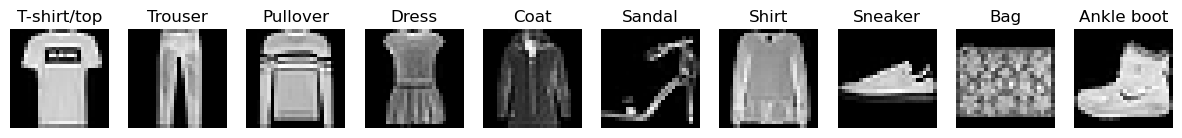

In [4]:
unique_classes = np.unique(y_train)

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 5))

for i, cls in enumerate(unique_classes):
    idx = np.where(y_train == cls)[0][0]
    
    img = X_train[idx]
    
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(labels[cls])
    axes[i].axis('off')

plt.show()

T-shirt/top: 6000 campioni
Trouser: 6000 campioni
Pullover: 6000 campioni
Dress: 6000 campioni
Coat: 6000 campioni
Sandal: 6000 campioni
Shirt: 6000 campioni
Sneaker: 6000 campioni
Bag: 6000 campioni
Ankle boot: 6000 campioni


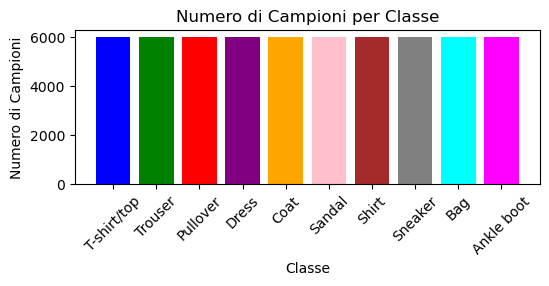

In [5]:
# Mostra numero di elementi per ogni classe
unique_values, counts = np.unique(y_train, return_counts=True)
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for value, count in zip(unique_values, counts):
    class_name = labels[value]
    print(f"{class_name}: {count} campioni")


colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']
plt.figure(figsize=(6, 2))
bars = plt.bar(labels, counts, color=colors)
plt.title('Numero di Campioni per Classe')
plt.xlabel('Classe')
plt.ylabel('Numero di Campioni')
plt.xticks(rotation=45)

plt.show()

In [6]:
print(type(X_train), type(X_test), type(y_train), type(y_test))
(X_train.shape), (X_test.shape), (y_train.shape), (y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [7]:
# Fa il reshape in 3 dimensioni
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [8]:
(X_train.shape), (X_test.shape), (y_train.shape), (y_test.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

### Label Encoding 

In [9]:
# Codifica le label in modo one hot
Y_train = to_categorical(y_train, num_classes = 10)


In [10]:
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
random_seed = 2

X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

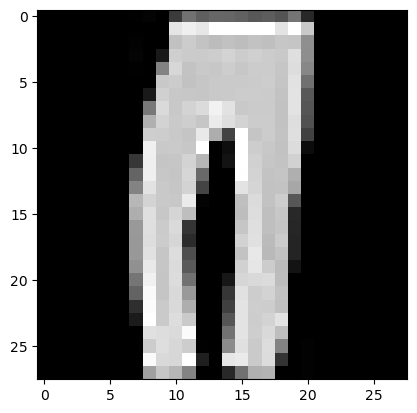

In [12]:
g = plt.imshow(X_train[0][:,:,0], cmap='gray')

### Costrizione della CNN

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)

checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min', verbose=1)

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.0005)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.0005)))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# kernel_regularizer 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [16]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
# optimizer= RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [17]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            verbose=1,
                                            min_lr=0.00001)

### Data Aumentation

In [19]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range=0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=True, 
        vertical_flip=True  
)

In [20]:
datagen.fit(X_train)

In [21]:
log_dir = "./logs"  
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [22]:
epochs = 25

batch_size = 64

In [23]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_val, y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size, 
                              callbacks=[learning_rate_reduction, early_stopping, checkpoint, tensorboard_callback])
# Con Adam

Epoch 1/25


843/843 [==============================] - ETA: 0s - loss: 1.0588 - accuracy: 0.6669
Epoch 1: val_loss improved from inf to 0.73005, saving model to best_model.h5


c:\Users\GiulioNocco\.conda\envs\corso\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


843/843 [==============================] - 145s 169ms/step - loss: 1.0588 - accuracy: 0.6669 - val_loss: 0.7300 - val_accuracy: 0.7727 - lr: 0.0010
Epoch 2/25
843/843 [==============================] - ETA: 0s - loss: 0.8125 - accuracy: 0.7565
Epoch 2: val_loss improved from 0.73005 to 0.64826, saving model to best_model.h5
843/843 [==============================] - 144s 170ms/step - loss: 0.8125 - accuracy: 0.7565 - val_loss: 0.6483 - val_accuracy: 0.8163 - lr: 0.0010
Epoch 3/25
843/843 [==============================] - ETA: 0s - loss: 0.7591 - accuracy: 0.7852
Epoch 3: val_loss improved from 0.64826 to 0.61707, saving model to best_model.h5
843/843 [==============================] - 147s 174ms/step - loss: 0.7591 - accuracy: 0.7852 - val_loss: 0.6171 - val_accuracy: 0.8363 - lr: 0.0010
Epoch 4/25
843/843 [==============================] - ETA: 0s - loss: 0.7265 - accuracy: 0.8003
Epoch 4: val_loss improved from 0.61707 to 0.56613, saving model to best_model.h5
843/843 [=============

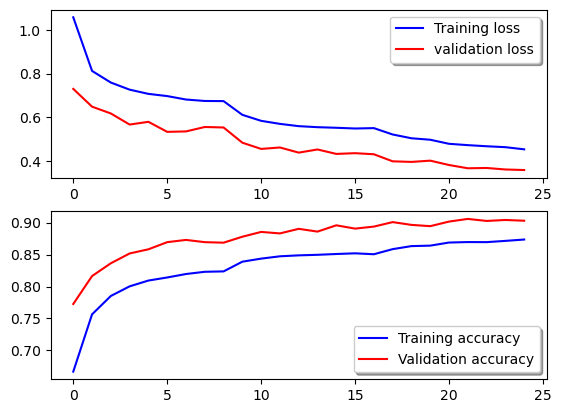

In [30]:
# Mostra l'andamento della loss e del accuracy sia sul training che sul validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [31]:
%load_ext tensorboard
%tensorboard --logdir=./logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 9304), started 4:06:26 ago. (Use '!kill 9304' to kill it.)

188/188 [==============================] - 3s 16ms/step


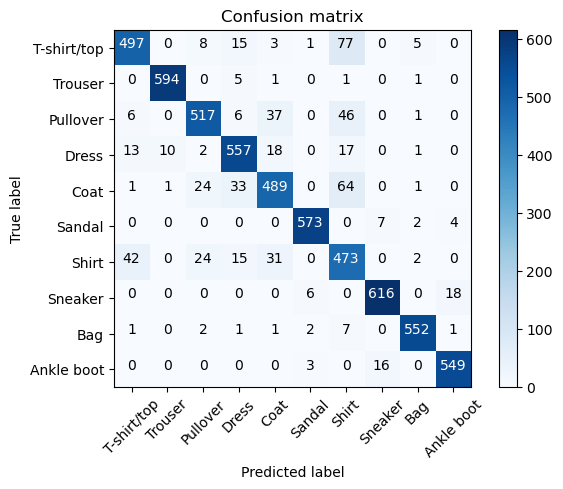

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = labels)


### Display degli errori 

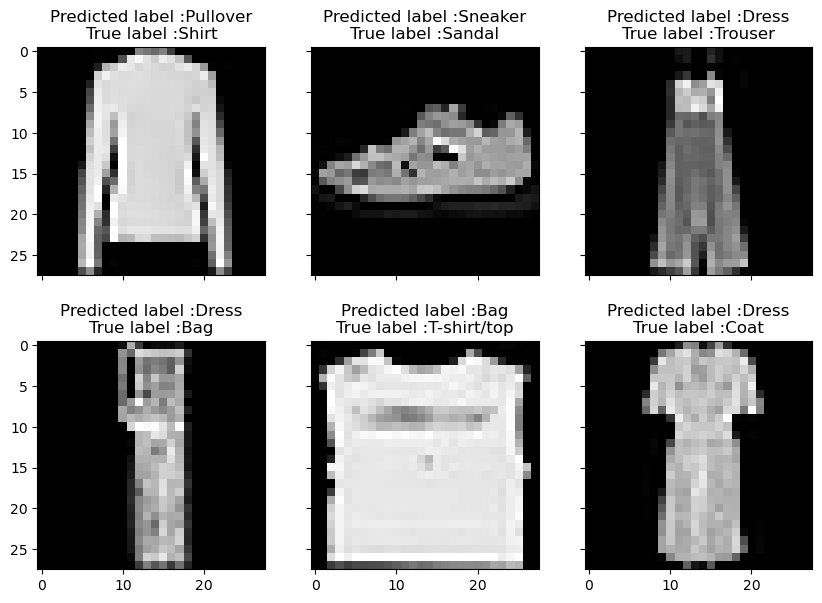

In [33]:
# mostra le immagine con la differenza maggiore tra pecentuale predetta ed effettiva label
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(10, 7))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(
                labels[pred_errors[error]],
                labels[obs_errors[error]]))
            n += 1

y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

sorted_dela_errors = np.argsort(delta_pred_true_errors)

most_important_errors = sorted_dela_errors[-6:]

display_errors(most_important_errors, X_val_errors, y_pred_classes_errors, y_true_errors)